# VIP
# Project 8: Machine Learning for Predictive Analytics

## Project : Reducing monthly churn by identifying high risk customers well in advance
About the Project: The project related to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:

1. High churn rate amongst customers leading to a revenue decline of ~500k USD every month
2. Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share

## Aim:
1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers

Hypothesis: Company CEO believes that existing models can predict churners precisely, but it’s too late to take any retention actions, as customer usage has significantly declined by then.

### Load Important Libraries

In [105]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [106]:
#edit the file location of raw data set
df=pd.read_csv("D:/AINE(Internship)/Telecom Data - Machine Learning/Telecom Data - Machine Learning/Telecom Data.csv")

## Descriptive Statistics of train data

In [107]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [108]:
df.shape

(51047, 58)

In [109]:
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [111]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
df[df['MonthlyRevenue']==0]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


Total six Customers have zero Monthly Revenue

### Q1.2 How many columns has missing values percentage > 5%

In [112]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

missing_val = df.isnull().sum()
missing_val_percent = ((missing_val/len(df))*100)
missing_val_analysis = {'missing_value': missing_val,'missing_value_percent': missing_val_percent}
missing_val_analysis = pd.DataFrame(missing_val_analysis)

In [113]:
missing_val_analysis[missing_val_analysis['missing_value_percent']>5]

,missing_value,missing_value_percent


<mark>__Result:__
    
Zero columns Contains missing value greater than 5%. Less than 2% of data is missing. Drop the rows containing missing values rather than imputing them

In [114]:
df = df.dropna()
df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

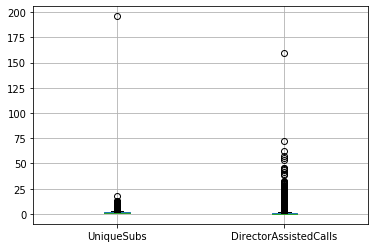

In [115]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.45
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


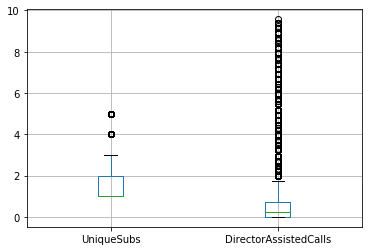

In [116]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value = [i/100 for i in range(95,101)]
df[cols].quantile(q_value)

df = df[(df['UniqueSubs']<=5) & (df['DirectorAssistedCalls']<=9.6156)]
df.boxplot(column=cols)

In [117]:
df.shape

(49045, 58)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

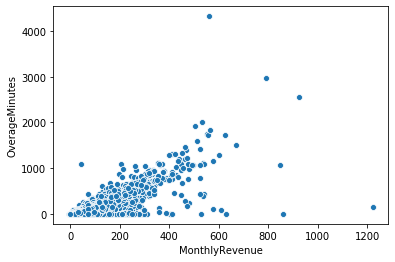

In [118]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = df)

<mark>__Result:__
    
From above scatter plot we can easily see that as high overage minutes also have high revenue

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

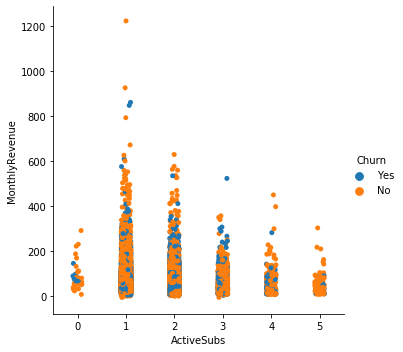

In [119]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", hue="Churn", data=df) 

<mark>__Result:__
    
Yes, above graph shows high number of active subscribers lead to low monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

In [120]:
df['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '2-High', '5-Low', '6-VeryLow',
       '7-Lowest'], dtype=object)

In [121]:
df.groupby('CreditRating')['CustomerID'].count()

CreditRating
1-Highest     8197
2-High       18533
3-Good        8085
4-Medium      5152
5-Low         6196
6-VeryLow      851
7-Lowest      2031
Name: CustomerID, dtype: int64

In [122]:
mapping = {
    '1-Highest': 5,
    '2-High': 4,
    '3-Good': 3,
    '4-Medium':3,
    '5-Low':2,
    '6-VeryLow':1,
    '7-Lowest':1
}

In [123]:
df['CreditRating'] = df['CreditRating'].map(mapping)

In [124]:
df.groupby('CreditRating')['CustomerID'].count()

CreditRating
1     2882
2     6196
3    13237
4    18533
5     8197
Name: CustomerID, dtype: int64

<BarContainer object of 5 artists>

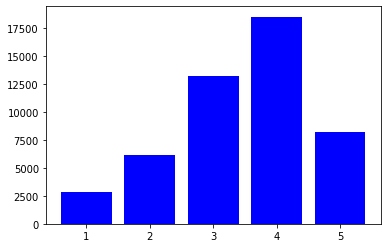

In [125]:
values = (2882,6196,13237,18533,8197)
labels = (1,2,3,4,5)
plt.bar(labels,values,color='Blue')

<Figure size 576x576 with 0 Axes>

Text(0.5, 0, 'CreditRating')

Text(0, 0.5, 'Churn_Count')

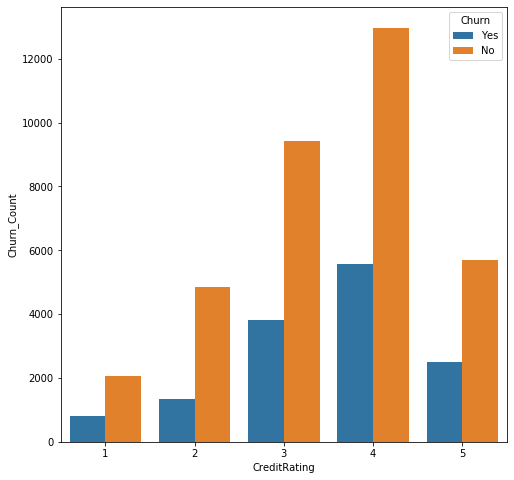

In [126]:
plt.figure(figsize=(8,8))
sns.countplot(df['CreditRating'], hue=df["Churn"])
plt.xlabel('CreditRating')
plt.ylabel('Churn_Count')
plt.show()

<mark>__Result:__
    
Observation: credit rating have an impact in churn rate

## Q3. Create additional features to help predict churn

In [127]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    df['perc_active_subs'] = df['ActiveSubs'] / df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    df['perc_recurrent_charge'] = df['TotalRecurringCharge'] / df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    df['perc_overage_min'] = df['OverageMinutes'] / df['MonthlyMinutes']
    
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    df['Not_Answered_Calls'] = df['DroppedBlockedCalls']+df['DroppedCalls']+df['BlockedCalls']+df['UnansweredCalls']
    
    return cust_df  


In [128]:
#Make a call to the feature engineering wrapper function for churn prediction
df=create_features(df)
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,30,Yes,5,Suburban,Professional,No,0.5,0.916667,0.0,9.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,30,No,3,Suburban,Professional,Yes,1.0,1.000589,0.0,3.3
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,Unknown,No,3,Town,Crafts,Yes,1.0,1.000000,0.0,0.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,10,No,3,Other,Other,No,1.0,0.911522,0.0,195.4
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,10,No,5,Other,Professional,Yes,1.0,0.991832,NaN,0.0


In [129]:
df = df.drop(['ActiveSubs', 'UniqueSubs', 'TotalRecurringCharge', 'MonthlyRevenue', 'OverageMinutes', 'MonthlyMinutes',
                
                'DroppedBlockedCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls'], axis = 1)

In [130]:
#Changing the data type of Target variable
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [131]:
df['Churn'].replace(('Yes', 'No'), (1, 0), inplace=True)

### Encoding Categorical Features
Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [132]:
#categorical features
cat_var = ['ChildrenInHH', 'HandsetRefurbished', 
          'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
          'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 
          'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 
          'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 
           'MadeCallToRetentionTeam','PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea']

from sklearn.preprocessing import LabelEncoder

# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    df[feature]= le.fit_transform(df[feature])

In [133]:
# Create Bins = 10 For ServiceArea 
df['ServiceAreaGroup'] = pd.cut(df['ServiceArea'], bins = 10,
                                 labels = ['ServiceAreaGroup0',
                                          'ServiceAreaGroup1',
                                          'ServiceAreaGroup2',
                                          'ServiceAreaGroup3',
                                          'ServiceAreaGroup4',
                                          'ServiceAreaGroup5',
                                          'ServiceAreaGroup6',
                                          'ServiceAreaGroup7',
                                          'ServiceAreaGroup8',
                                          'ServiceAreaGroup9'])

In [134]:
df['ServiceAreaGroup'].unique()

[ServiceAreaGroup8, ServiceAreaGroup4, ServiceAreaGroup7, ServiceAreaGroup9, ServiceAreaGroup3, ServiceAreaGroup1, ServiceAreaGroup6, ServiceAreaGroup5, ServiceAreaGroup2, ServiceAreaGroup0]
Categories (10, object): [ServiceAreaGroup0 < ServiceAreaGroup1 < ServiceAreaGroup2 < ServiceAreaGroup3 ... ServiceAreaGroup6 < ServiceAreaGroup7 < ServiceAreaGroup8 < ServiceAreaGroup9]

In [135]:
# Create Dummies For ServiceAreaGroup
df['ServiceAreaGroup'] = pd.get_dummies(df['ServiceAreaGroup'])

In [136]:
#drop the service area and Customer ID
df = df.drop(columns =['ServiceArea', 'CustomerID' ], axis = 1)

In [137]:
df.head()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls,ServiceAreaGroup
0,1,0.25,0.0,-157.0,-19.0,0.0,0.0,97.2,0.0,0.0,...,1,5,2,4,0,0.5,0.916667,0.0,9.0,0
1,1,0.00,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,2,4,2,1.0,1.000589,0.0,3.3,0
2,0,0.00,0.0,-2.0,0.0,0.0,0.0,0.4,0.3,0.0,...,0,3,3,1,2,1.0,1.000000,0.0,0.0,0
3,0,1.24,0.0,157.0,8.1,4.3,1.3,200.3,370.3,147.0,...,0,3,0,3,0,1.0,0.911522,0.0,195.4,0
4,1,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,...,0,5,0,4,2,1.0,0.991832,NaN,0.0,0


### Handset price is numerical however it is howing as object because of 'Unknown' present in Data set. Unknown represents the missing value. Filling missing value with mean to change its data type

In [138]:
df['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '200', '100',
       '60', '130', '400', '250', '180', '240', '500'], dtype=object)

In [139]:
#Replacing 'Unknown' with 'NaN'
df['HandsetPrice'] = df['HandsetPrice'].replace("Unknown", np.nan)

In [140]:
df['HandsetPrice'].unique()

array(['30', nan, '10', '80', '150', '300', '40', '200', '100', '60',
       '130', '400', '250', '180', '240', '500'], dtype=object)

In [141]:
#Checking for missing value Count
df['HandsetPrice'].isna().sum()

28029

In [142]:
#reshaping to impute missing values
Column = df['HandsetPrice'].values.reshape(-1,1)

In [143]:
#impute missing values with mean
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['HandsetPrice'] = imp_mean.fit_transform(Column)

In [144]:
df.dtypes

Churn                          int64
DirectorAssistedCalls        float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
Handsets                     float64
HandsetModels                float64
CurrentEquipmentDays         float64
AgeHH1                       float64
AgeHH2                       float64
ChildrenInHH                   int32
HandsetRefurbished             int32
HandsetWebCapable              int32
TruckOwner                     int32
RVOwner                        int32
Homeownership                  int32
BuysViaMailOrder               int32
R

### Cleaning the data to avoid any kind of value error

In [145]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [146]:
df =  clean_dataset(df)

## Correlation Analysis

In [147]:
df.corr()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls,ServiceAreaGroup
Churn,1.000000,-0.012865,0.011752,-0.033492,0.013372,-0.032012,-0.020797,-0.029764,-0.024898,-0.029559,...,0.059288,0.043106,0.003072,-0.006694,0.008808,-0.046543,-0.049500,0.055361,-0.016223,-0.011348
DirectorAssistedCalls,-0.012865,1.000000,0.053773,-0.018977,-0.012888,0.090279,0.097210,0.260542,0.304725,0.176390,...,0.012019,-0.085166,-0.024884,-0.013324,-0.038994,-0.023543,-0.241539,0.099900,0.292490,-0.006164
RoamingCalls,0.011752,0.053773,1.000000,-0.045361,-0.070735,0.018867,0.018333,0.045370,0.042148,0.019405,...,-0.002001,-0.015528,0.001760,-0.006875,-0.000127,0.005836,-0.134056,0.011916,0.052027,0.008687
PercChangeMinutes,-0.033492,-0.018977,-0.045361,1.000000,0.614050,-0.040409,-0.027292,-0.105789,-0.063465,-0.067390,...,-0.023974,0.030918,-0.004005,0.006068,-0.003542,0.005213,0.015055,-0.001202,-0.094200,-0.000009
PercChangeRevenues,0.013372,-0.012888,-0.070735,0.614050,1.000000,-0.033718,0.015700,-0.080481,-0.040690,-0.044749,...,-0.021545,0.019886,-0.001035,0.006870,0.000835,0.001737,0.000316,0.007314,-0.053093,-0.000862
CustomerCareCalls,-0.032012,0.090279,0.018867,-0.040409,-0.033718,1.000000,0.236616,0.292582,0.282851,0.211271,...,0.025445,-0.205613,-0.065824,-0.034286,-0.069553,0.000685,-0.082101,0.002630,0.422458,0.010911
ThreewayCalls,-0.020797,0.097210,0.018333,-0.027292,0.015700,0.236616,1.000000,0.225864,0.201734,0.149110,...,0.005807,-0.100060,-0.051789,-0.018283,-0.048176,0.002692,-0.087752,0.034608,0.346619,0.012501
ReceivedCalls,-0.029764,0.260542,0.045370,-0.105789,-0.080481,0.292582,0.225864,1.000000,0.642988,0.613108,...,0.007799,-0.197581,-0.081429,-0.043180,-0.101281,-0.023308,-0.293302,0.126636,0.589891,0.012328
OutboundCalls,-0.024898,0.304725,0.042148,-0.063465,-0.040690,0.282851,0.201734,0.642988,1.000000,0.723819,...,0.012644,-0.164157,-0.093857,-0.035651,-0.096021,-0.022637,-0.243741,0.088054,0.612115,0.012964
InboundCalls,-0.029559,0.176390,0.019405,-0.067390,-0.044749,0.211271,0.149110,0.613108,0.723819,1.000000,...,0.006374,-0.140384,-0.077048,-0.030943,-0.068949,-0.012811,-0.176235,0.054533,0.474117,0.004852


## Check for class imbalance for target variable

In [148]:
# target class count
df["Churn"].value_counts()

0.0    34730
1.0    13644
Name: Churn, dtype: int64

## Resampling imbalanced dataset

In [149]:
churn_0_count,churn_1_count = df["Churn"].value_counts()
# print(churn_0_count,churn_1_count)
churn_1 = df[df['Churn']==1]
churn_0 = df[df['Churn']==0]

churn_1_over = churn_1.sample(churn_0_count,replace=True)
df = pd.concat([churn_1_over,churn_0])
(df['Churn'].value_counts()/len(df))*100


0.0    50.0
1.0    50.0
Name: Churn, dtype: float64

In [150]:
X = df.drop('Churn',axis =1)
y = df['Churn']

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [151]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# #Feature scaling for all continuous variable
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# #Create dummy variables for all categorical variables
# #X = pd.get_dummies(X)


(48622, 50)
(20838, 50)
(48622,)
(20838,)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


## LOGISTIC REGRESSION

In [152]:
from sklearn.linear_model import LogisticRegression

# selecting the classifier
model1 = LogisticRegression()


model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation¶

[[5388 5182]
 [3882 6386]]


0.5650254343027162
              precision    recall  f1-score   support

         0.0       0.58      0.51      0.54     10570
         1.0       0.55      0.62      0.58     10268

    accuracy                           0.57     20838
   macro avg       0.57      0.57      0.56     20838
weighted avg       0.57      0.57      0.56     20838



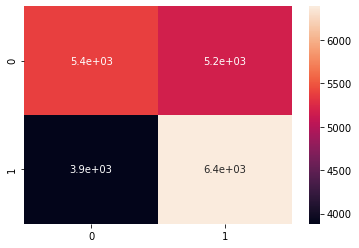

In [153]:
# checking model performance
y_predicted= model1.predict(X_test)


#Confusion Matrix
#Find the confusion matrix of the model and estimate its accuracy.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


## RANDOM FOREST

In [154]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Evaluation¶

[[9403 1167]
 [1369 8899]]


0.8782992609655437
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     10570
         1.0       0.88      0.87      0.88     10268

    accuracy                           0.88     20838
   macro avg       0.88      0.88      0.88     20838
weighted avg       0.88      0.88      0.88     20838



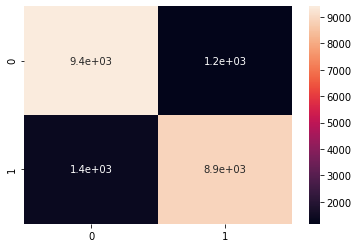

In [155]:
y_pred = model2.predict(X_test)

cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

<mark>__Result:__
    
With accuracy score of 88% Random Forest classifier is best model to predict the target class

### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance Plot')

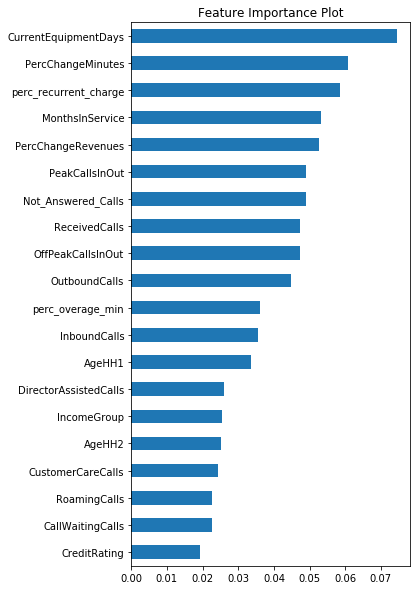

In [156]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("Feature Importance Plot")
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

## Test Data Output
## Load The Data

In [157]:
df1=pd.read_csv("D:\AINE(Internship)\Telecom Data - Machine Learning\Telecom Data - Machine Learning\Telecom - Prediction Data.csv")

### Descriptive Statistics

In [158]:
df1.shape

(20000, 58)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [160]:
df1.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,...,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,...,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,...,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,...,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,...,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,...,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,...,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000


### Drop the Customer ID and Churn

In [161]:
df1 = df1.drop(['CustomerID','Churn'],axis = 1)

In [162]:
df1.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                       int64
HandsetModels                  int64
C

In [163]:
missing_value = df1.isna().sum()
missing_value_Percent = (missing_value/len(df1))*100
missing_value_analysis = {'missing_value': missing_value , 'missing_value_percentage': missing_value_Percent}
missing_value_analysis = pd.DataFrame(missing_value_analysis)
missing_value_analysis

,missing_value,missing_value_percentage
MonthlyRevenue,60,0.300
MonthlyMinutes,60,0.300
TotalRecurringCharge,60,0.300
DirectorAssistedCalls,60,0.300
OverageMinutes,60,0.300
RoamingCalls,60,0.300
PercChangeMinutes,135,0.675
PercChangeRevenues,135,0.675
DroppedCalls,0,0.000
BlockedCalls,0,0.000


In [164]:
df1 = df1.dropna()

In [165]:
#wrapper function to create additional features for churn prediction
def create_features1(df1):
    
    #3.1 Percent of current active subs over total subs
    
    df1['perc_active_subs'] = df1['ActiveSubs'] / df1['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    
    df1['perc_recurrent_charge']= df1['TotalRecurringCharge'] / df1['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    
    df1['perc_overage_min']= df1['OverageMinutes'] / df1['MonthlyMinutes']
    
    # Total of Not Answered Calls
    
    df1['Not_Answered_Calls'] = df1['DroppedBlockedCalls']+df1['DroppedCalls']+df1['BlockedCalls']+df1['UnansweredCalls']
    
    
    
    return df1

In [166]:
df1=create_features1(df1)
df1.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,79.9
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,97.7
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,207.4
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,22.7
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,61.1


In [167]:
# drop the columns after creating new important features
df1= df1.drop(['ActiveSubs', 'UniqueSubs', 'TotalRecurringCharge', 'MonthlyRevenue', 'OverageMinutes', 'MonthlyMinutes',
                
                'DroppedBlockedCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls'], axis = 1)

In [168]:
#categorical features
cat_var1 = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
           'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 
           'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 
           'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 
           'PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea']

# from sklearn.preprocessing import LabelEncoder

# initializing label encoder
le1= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var1:
    df1[feature]= le1.fit_transform(df1[feature])

In [169]:
#Rechecking the data types
df1.dtypes

DirectorAssistedCalls        float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
ServiceArea                    int32
Handsets                       int64
HandsetModels                  int64
CurrentEquipmentDays           int64
AgeHH1                       float64
AgeHH2                       float64
ChildrenInHH                   int32
HandsetRefurbished             int32
HandsetWebCapable              int32
TruckOwner                     int32
RVOwner                        int32
Homeownership                  int32
BuysViaMailOrder               int32
R

In [170]:
def clean_dataset1(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [171]:
# Clean the Test data
df1 =  clean_dataset1(df1)
df1.shape

(19252, 50)

In [172]:
Churn = ()

In [173]:
#implementing RamdomForest model on test dataset
pred_test = model2.predict(df1)

In [174]:
pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [175]:
pred_test.shape

(19252,)

In [176]:
df1['Churn'] = pred_test

In [177]:
df1['Churn'].value_counts()

0.0    18383
1.0      869
Name: Churn, dtype: int64

# THANK YOU